# Concepts in Network Theory

(Modified from _Peder Lillebostad's_ https://github.com/oercompbiomed/CBM101/tree/master/D_Network_analysis)

BMED360-2021  `01-Concepts-in-network-theory.ipynb`

<a href="https://colab.research.google.com/github/computational-medicine/BMED360-2021/blob/main/Lab6-Networks_Graphs/01-Concepts-in-network-theory.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Learning objectives

Networks: Network representations are ubiquitous for things like social 
networks, the world wide web, transportation and power grids. 

In biology it naturally projects to dynamics of molecular interaction inside cells 
(metabolic or protein-protein networks), neuroscience and and ecological networks. In this submodule we will 
focus on the first two. As an example of an abstract network, the image below of [Disease network](https://barabasi.com/f/320.pdf) is constructed from protein-protein interactions (two diseases are considered connected if their disease-associated genes interact, or if they share such a gene).

<img src="assets/barabasi_disease_network.png" alt="disease network" style="float:left" width="400" />


Network theory is also being increasingly used in neuroscience, coined **connectomics**. Nothing about the idea is new, as it dates back at last 100 years, but only with advances in imaging technologies have we started to gain access into what it looks like. Some neuroscientists believe that if we had perfect resolution of an individual's connectome, this would (in theory) allow full access into that person's memories, experiences, knowledge and personality.

We leave you with a few articles to appreciate network theory as a tool to study biology.

https://barabasi.com/f/320.pdf

https://www.nature.com/articles/nrg.2016.87

https://www.nature.com/articles/nrg1272

For great explanations of more or less advanced network science concepts and algorithms in Python, we recommend to check out [this](https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python) tutorial.

## Network representation

The **Seven Bridges of Königsberg** (now Kaliningrad, divided by the Pregel River) is a historically notable problem in mathematics. Its negative resolution by Leonhard Euler in 1736 laid the foundations of graph theory and prefigured the idea of topology [[wikipedia](https://en.wikipedia.org/wiki/Seven_Bridges_of_K%C3%B6nigsberg)]. Euler shows that the possibility of a walk through a graph, traversing each edge exactly once, depends on the degrees of the nodes. A necessary (and sufficient) condition for the walk of the desired form (an _Eulerian path_) is that the graph is connected and have exactly zero or two nodes of odd degree ...  [How many nodes of odd degree is there in this case?]

![Konigsberg-Euler](./assets/Konigsberg_Euler.png)

Networks are most naturally visualized as a set of points (nodes) connected by lines (edges).

<img
src="assets/graph_random_circle.png"
width=300
/>

This data is typically stored as a list of edges, for the figure above we would have G = {A,B}, {B,A}, {B,C}.
Another equivalent form is the adjacency matrix, which is less intuitive, but mathematically appealing (color code: black=1; white=0).


<img
src="assets/matrix_example.png"
width=500
/>

## Setup

In [1]:
# Set this to True if you are using Colab:
colab=False

# Set this to True if you will be using Brain Connectivity Toolbox (for Python)
bct = False     # If True: pip install bctpy 

In [2]:
if colab:
    !pip install gdown
    !pip install networkx

In [3]:
import os
from os.path import expanduser, join, basename, split
import platform
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
print(f'networkx version: {nx.__version__}')

%matplotlib inline

networkx version: 2.5.1


In [4]:
cwd = os.getcwd()
assets_dir =  join(cwd, 'assets')
sol_dir =  join(cwd, 'solutions')

In [5]:
if platform.system() == 'Darwin':
    print(f'OK, you are running on MacOS ({platform.version()})')
if platform.system() == 'Linux':
    print(f'OK, you are running on Linux ({platform.version()})')
if platform.system() == 'Windows':
    print(f'OK, but consider to install WSL for Windows10 since you are running on {platform.system()}')
    print('Check https://docs.microsoft.com/en-us/windows/wsl/install-win10')

OK, you are running on MacOS (Darwin Kernel Version 20.4.0: Thu Apr 22 21:46:47 PDT 2021; root:xnu-7195.101.2~1/RELEASE_X86_64)


In [6]:
# Download zip-file if ./assets does not exist (as when running in Colab)

if os.path.isdir(assets_dir) == False:
    
    ## Download assets.zip for Google Drive            
    # https://drive.google.com/file/d/1tRcRTxNT8nwNFrmGYJqo1B8WgGJ2yEgq/view?usp=sharing
    file_id = '1tRcRTxNT8nwNFrmGYJqo1B8WgGJ2yEgq'
    url = 'https://drive.google.com/uc?id=%s' % file_id
    output = 'assets.zip'
    gdown.download(url, output, quiet=False)
    
    ## Unzip the assets file into `./assets`
    shutil.unpack_archive(output, '.')
    
    ## Delete the `assets.zip` file
    os.remove(output)
else:
    print(f'./assets  exists already!')

./assets  exists already!


In [7]:
# Download zip-file if ./solutions does not exist (as when running in Colab)

if os.path.isdir(sol_dir) == False:
    
    ## Download assets.zip for Google Drive            
    # https://drive.google.com/file/d/16MuT-pshT473eADdqhFr_dmb-4QPGt4r/view?usp=sharing
    file_id = '16MuT-pshT473eADdqhFr_dmb-4QPGt4r'
    url = 'https://drive.google.com/uc?id=%s' % file_id
    output = 'solutions.zip'
    gdown.download(url, output, quiet=False)
    
    ## Unzip the assets file into `./solutions`
    shutil.unpack_archive(output, '.')
    
    ## Delete the `solutions.zip` file
    os.remove(output)
else:
    print(f'./solutions  exists already!')

./solutions  exists already!


####  Exercise 1. construct the matrix (numpy array), $A$ representing the following graph, and print $A$ and $A^T$ (matrix transpose)

<img
src="assets/ex0_1.png"
width=200
style="float: left"
/>

Hint: we write the connection from row to column (e.g. the link from 1 to 3 should be at the 1st row and 3rd column). Note this convention is not always consistent. We have here a node cardinality, |V| = 5, where V = {A, B, C, D E} 
and node numbering and corresponding labels will be 0:'A', 1:'B', ..., 4:'E'  i.e. a dictionary you could call `labels`.

In [8]:
# %load solutions/ex1_1.py
labels = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E'}

A = np.array([
       [0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0.]])

print(f' A =\n {A}, \n A^T =\n {A.T}')
print(f'labels: {labels}')


 A =
 [[0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0.]], 
 A^T =
 [[0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
labels: {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'}


`NetworkX` is a python library specialized for working with graphs. They provide a class `networkx.Graph` which stores a network as a list of edges. We can convert freely between the different representations using `networkx`.
Plotting a graph can also be according to differnet graph [`layout`](https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout).

In [9]:
import networkx as nx
print(nx.__version__)
G = nx.from_numpy_array(A)
pos = nx.spring_layout(G)  # positions for all nodes

2.5.1


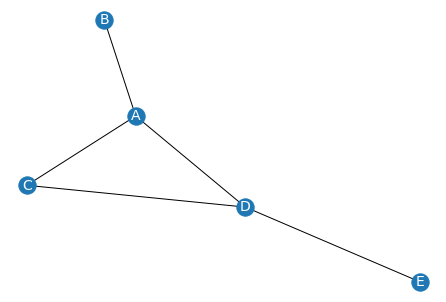

In [10]:
nx.draw(G, pos)
nx.draw_networkx_labels(G, pos, labels, font_size=14, font_color='w')
plt.show()

## Directedness and weightedness

We have two questions of network properties to consider when making a model:
- is the edges directed or undirected? 
- are the edges continuous or binary?

For instance, the WWW is directed, but a social acquaintance does not follow a particular direction. We can use the `nx.DiGraph` class to force it to create a directed graph.

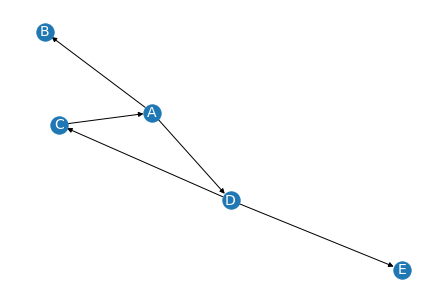

In [11]:
G_dir = nx.from_numpy_array(A, create_using=nx.DiGraph)

pos = nx.spring_layout(G_dir)  # positions for all nodes
nx.draw(G_dir, pos)
nx.draw_networkx_labels(G_dir, pos, labels, font_size=14, font_color='w')
plt.show()

And we can just as easily transform it back into a numpy array:

In [12]:
M = nx.to_numpy_array(G_dir)
M == A #they are the same as expected

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

## Graph metrics
Graph metrics are numbers that quanitfy certain properties of a network (global metrics) or about specific nodes in the network (local metrics). Because it is hard to infer things about a network simply by looking at it, these numbers capture the essence of a network, and lets us test specific hypotheses about network structure.

<img src="assets/rubinov_sporns_2010_neuroimage.png"
     alt="graph metrics"
     width=1000
     style="float: left; margin-right: 10px;" />

##### A bunch of other graph metrics exist that quantify importance of a node within a network.
These are collectively termed "centrality", but all quantify slightly different things.

- degree centrality
- betweenness centrality
- closeness centrality

##### Other metrics quantify overall network structure
- density
- efficiency
- small-worldness
- modularity


The various metrics are tempting to use, but it is crucial to interpret them according to the network you happen to study.

We will be using the **Brain Connectivity Toolbox** for Python `bctpy` (https://github.com/aestrivex/bctpy). If you don't have it already installed, uncomment and run the cell below. (See also https://adamj.eu/tech/2020/02/25/use-python-m-pip-everywhere)

In [13]:
if bct:
    import sys
    print(sys.executable)
    !{sys.executable} -m pip install git+https://github.com/aestrivex/bctpy.git
    import bct

In [14]:
from matplotlib import pyplot as plt

### Visualizing bottlenecks (betweenness centrality)

Biological relevance: H. Yu et al. _The Importance of Bottlenecks in Protein Networks: Correlation with Gene Essentiality and Expression Dynamics_. PLoS Comput Biol 2007;3(4):e59 [[online](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.0030059)]<br>
" _... By definition, most of the shortest paths in a network go through the nodes with high betweenness. Therefore, these nodes become the central points controlling the communication among other nodes in the network. More recently, Girvan and Newman proposed that the edges with high betweenness are the ones that are “between” highly interconnected subgraph clusters (i.e., “community structures”); therefore, removing these edges could partition a network._"

<img alt="H. Yu et al. 2007 Fig 1" src="https://journals.plos.org/ploscompbiol/article/figure/image?size=large&id=10.1371/journal.pcbi.0030059.g001" width="400px" heigh="auto">

Schematic Showing a Bottleneck and the Four Categories of Nodes in a Network.
Four nodes with different colors represent examples of the four categories defined by degree and betweenness. Please note that every node in the network belongs to one of the four categories. However, in this schematic, we only point out the categories of the four example nodes.<br>


Try to convince yourself of why the numbers below make sense

In [15]:
A = np.array([
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

A
G = nx.from_numpy_array(A.T)

Text(0.5, 1.0, 'Bottleneck centrality')

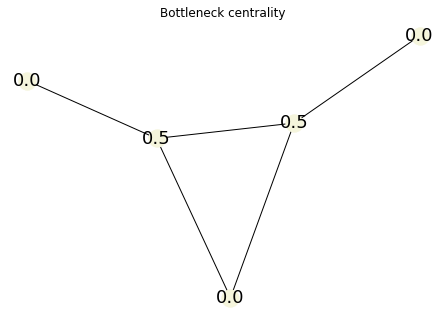

In [16]:
btw = nx.betweenness_centrality(G)
#pos = nx.drawing.layout.kamada_kawai_layout(G)
pos = nx.layout.spring_layout(G, seed=1)
nx.draw(G, pos=pos, labels=btw, node_color='beige', font_size=18, font_color='k')
plt.title('Bottleneck centrality')

Text(0.5, 1.0, 'Degree centrality')

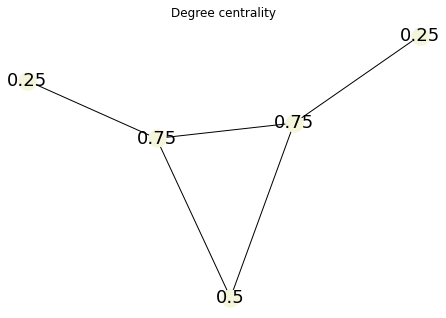

In [17]:
deg = nx.centrality.degree_centrality(G)
nx.draw(G, pos=pos, labels=deg, node_color='beige', font_size=18, font_color='k')
plt.title('Degree centrality')

Notice how the bottom node has a high degree centrality, but low bottleneck centrality. 

Text(0.5, 1.0, 'Clustering Coefficient')

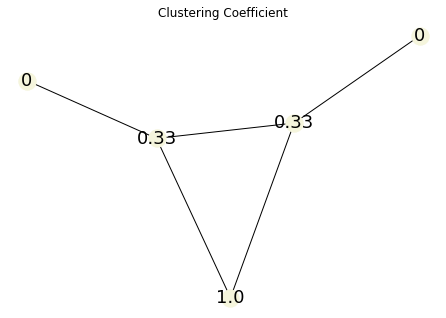

In [18]:
cc = nx.clustering(G)
cc2 = {key : round(cc[key], 2) for key in cc}  # dictionary comprehension for rounding values to 2 decimals

nx.draw(G, pos=pos, labels=cc2, node_color='beige', font_size=18, font_color='k')
plt.title('Clustering Coefficient')

# A more advanced example of network theory in action
Consider the world wide web (WWW), one of the more familiar networks of everyday life. When performing a search with your search engine of choice, it has to sort the results based on some kind of importance metric. The old method of doing this was to base it upon page *content*, and rate it accordingly. This method yielded very poor results. An ingenious milestone was, paradoxically, to dismiss the site content, and *only* look at its **topological** position in the network.

### PageRank
We use the seemingly circular argument: a page (node) is important if other important pages point (link) to it. We start with an initial distribution of "importance" between the nodes, then at each iteration the node redistributes its own importance determined by their outward links (imagine a surfer who at each time step has a certain probability of moving to a new page). This process is allowed to repeat, and will at some point reach steady state. The below image has already reached steady state.


<img src="assets/PageRanks-Example_345Kai_no(c).jpg"
     alt="graph metrics"
     width=500
     style="float: left; margin-right: 10px;" />
(image credit to 345Kai wikipedia)

We will go on to reproduce the above figure.

In [19]:
np.set_printoptions(2)

In [20]:
# define the edges. A is set to link to all other pages
#(a mathematical necessity because it has no outward links)

M = np.array([
       [1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

#### Exercise 2. normalize the edges such that the sum of the columns equal to 1.

Hint: first compute the column sums (yielding a vector) **(a)**, then divide each column by that vector (broadcasting) **(b)**. Verify that the columns sum to one **(c)**.

#### a)

In [21]:
# %load solutions/ex1_2a.py
col_sums = np.sum(M, axis=0)
col_sums

array([11.,  1.,  1.,  2.,  3.,  2.,  2.,  2.,  2.,  1.,  1.])

#### b)

In [22]:
# %load solutions/ex1_2b.py
M = M / col_sums[np.newaxis, :] #newaxis ensures the broadcasting is correct
M

array([[0.09, 0.  , 0.  , 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 1.  , 0.5 , 0.33, 0.5 , 0.5 , 0.5 , 0.5 , 0.  , 0.  ],
       [0.09, 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.  , 0.  , 0.33, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.  , 0.  , 0.  , 0.5 , 0.5 , 0.5 , 0.5 , 1.  , 1.  ],
       [0.09, 0.  , 0.  , 0.  , 0.33, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

#### c)

In [23]:
# %load solutions/ex1_2c.py
np.sum(M, axis=0)
#or
np.isclose(np.sum(M, axis=0), 1.)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

### The pagerank algorithm

In [24]:
# from https://en.wikipedia.org/wiki/PageRank#Simplified_algorithm
import numpy as np

def pagerank(M, num_iterations: int = 100, d: float = 0.85):
    """PageRank: The trillion dollar algorithm.

    Parameters
    ----------
    M : numpy array
        adjacency matrix where M_i,j represents the link from 'j' to 'i', such that for all 'j'
        sum(i, M_i,j) = 1
    num_iterations : int, optional
        number of iterations, by default 100
    d : float, optional
        damping factor, by default 0.85

    Returns
    -------
    numpy array
        a vector of ranks such that v_i is the i-th rank from [0, 1],
        v sums to 1

    """
    N = M.shape[1]
    v = np.random.rand(N, 1)
    v = v / np.linalg.norm(v, 1)
    M_hat = (d * M + (1 - d) / N)
    for i in range(num_iterations):
        v = M_hat @ v
    return v

#### Exercise 3: 
Compute the pagerank (call it `pr`) and confirm it matches with the figure shown above (within a reasonable margin of error).

In [25]:
# %load solutions/ex1_3.py
pr = pagerank(M)
print(pr*100)
np.sum(pr)

[[ 3.28]
 [38.44]
 [34.29]
 [ 3.91]
 [ 8.09]
 [ 3.91]
 [ 1.62]
 [ 1.62]
 [ 1.62]
 [ 1.62]
 [ 1.62]]


1.000000000000002

## Visualize that the results check out

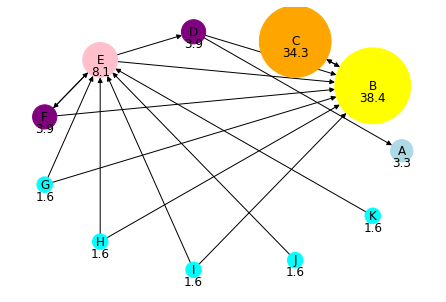

In [26]:
names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
colors = ['lightblue', 'yellow', 'orange', 'purple', 'pink', 'purple', 'cyan','cyan','cyan','cyan','cyan']

G = nx.from_numpy_array(M.T, create_using=nx.DiGraph)
nx.relabel_nodes(G, lambda k: dict(zip(range(11), names))[k], copy=False)

# remove edges
rem = [edge for edge in G.edges if edge[0]=='A']
G.remove_edges_from(rem)
pos = nx.layout.circular_layout(G)

pr = dict(zip(names, pr.flatten()))

for k,v in pr.items():
    pr[k] = round(v*100, 1)
    
node_size = np.array(list(pr.values()))*150

nx.draw(G, pos=pos, node_color=colors, with_labels=True, node_size=node_size)
for k,v in pos.items(): v[1]-=0.1
nx.draw_networkx_labels(G, labels=pr, pos=pos)
plt.show()

<img src="assets/PageRanks-Example_345Kai_no(c).jpg"
     alt="graph metrics"
     width=500
     style="float: left; margin-right: 10px;" />

This example was simply for illustration, we could just as easily have used networkX's own implementation of pagerank.

In [27]:
#this will export the solutions to the exercises
#!python ../nb2sln.py 01-Concepts-in-network-theory.ipynb

In [28]:
## TODO
## go through random graph, degree distribution
## go through small-worlds 
## show img of regular -> sw -> random

## See github course for inspo https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience
## See https://github.com/je-suis-tm/graph-theory

## EXTRA: Interactive visualization of different [`random graphs`](https://networkx.org/documentation/networkx-2.5/reference/generators.html#module-networkx.generators.random_graphs) (using [`ipywidgets`](https://github.com/jupyter-widgets/ipywidgets))
(Adopted from https://github.com/jupyter-widgets/ipywidgets/blob/master/docs/source/examples/Exploring%20Graphs.ipynb)

In [29]:
from ipywidgets import interact

In [30]:
# Wrap a few graph generation functions so they have the same signature

def random_lobster(n, m, k, p):  # Return a random lobster
    # A lobster is a tree that reduces to a caterpillar when pruning all leaf nodes.
    # A caterpillar is a tree that reduces to a path graph when pruning all leaf nodes (p/m=0).
    # n: The expected number of nodes in the backbone
    # p: Probability of adding an edge to the backbone
    # p/m: Probability of adding an edge one level beyond backbone
    return nx.random_lobster(n, p, p / m)  # n-

def powerlaw_cluster(n, m, k, p): # Retun graph with powerlaw degree distribution and approximate average clustering
    # n: The number of nodes
    # m: The number of random edges to add for each new node
    # p: Probability of adding a triangle after adding a random edge
    return nx.powerlaw_cluster_graph(n, m, p)

def erdos_renyi(n, m, k, p):  # Return a random graph G_{n,p} (Erdős-Rényi graph, binomial graph)
    # n: The number of nodes
    # p: Probability for edge creation
    return nx.erdos_renyi_graph(n, p)

def newman_watts_strogatz(n, m, k, p):  # Return a Newman-Watts-Strogatz small world graph
    # n: The number of nodes
    # k: Each node is connected to k nearest neighbors in ring topology
    # p: The probability of adding a new edge for each edge
    return nx.newman_watts_strogatz_graph(n, k, p)

def dense_gnm_random_graph(n, m, k, p):  # Return the random graph G_{n,m}.
    # Gives a graph picked randomly out of the set of all graphs with n nodes and m edges
    # n: The number of nodes
    # m: The number of edges
    return nx.dense_gnm_random_graph(n, m)

def random_regular_graph(n, m, k, p):  # Return a random regular graph of n nodes each with degree d
    # The resulting graph G has no self-loops or parallel edges
    # n: Degree
    # m: Number of nodes. The value of m*n must be even. The 0 <= n < m inequality must be satisfied
    return nx.random_regular_graph(n, m)

def plot_random_graph(n, m, k, p, generator):
    g = generator(n, m, k, p)
    nx.draw(g)
    plt.show()

In [31]:
interact(plot_random_graph, n=(2,30), m=(1,10), k=(1,10), p=(0.0, 0.99, 0.001),
         generator=[
             ('lobster', random_lobster),
             ('power law', powerlaw_cluster),
             ('Newman-Watts-Strogatz', newman_watts_strogatz),
             (u'Erdős-Rényi', erdos_renyi),
             ('dense random G_{n,m}', dense_gnm_random_graph),
             ('regular n*m|2, n<m', random_regular_graph)
         ]);

interactive(children=(IntSlider(value=16, description='n', max=30, min=2), IntSlider(value=5, description='m',…